In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random
# set global seed 
random.seed(x)


In [98]:
df_genres = pd.read_csv('../data/df_genres.csv')

genres_list = ['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [82]:
# add the red dots for the datapoints in the files: "../data/recommendations/user_recommendations_genres.pkl" and "../data/recommendations/user_recommendations_min_hash.pkl"
dict_user_recommendations_genres = pd.read_pickle('../data/recommendations/user_recommendations_genres.pkl')
dict_user_recommendations_min_hash = pd.read_pickle('../data/recommendations/user_recommendations_min_hash.pkl')
# the data is {userid: [(movieId, score), ...], ...}


In [83]:
dict_user_recommendations_genres

{304: [(50, 1.0),
  (83, 1.0),
  (142, 1.0),
  (170, 1.0),
  (196, 1.0),
  (209, 1.0),
  (335, 1.0),
  (360, 1.0),
  (366, 1.0),
  (401, 1.0),
  (475, 1.0),
  (477, 1.0),
  (492, 1.0),
  (522, 1.0),
  (606, 1.0),
  (651, 1.0),
  (698, 1.0),
  (724, 1.0),
  (728, 1.0),
  (736, 1.0),
  (800, 1.0),
  (833, 1.0),
  (932, 1.0),
  (944, 1.0),
  (966, 1.0),
  (1017, 1.0),
  (1129, 1.0),
  (1164, 1.0),
  (1424, 1.0),
  (1425, 1.0),
  (1487, 1.0),
  (1550, 1.0),
  (1558, 1.0),
  (1560, 1.0),
  (1582, 1.0),
  (1669, 1.0),
  (1730, 1.0),
  (1768, 1.0),
  (1775, 1.0),
  (1849, 1.0),
  (1870, 1.0),
  (1896, 1.0),
  (1932, 1.0),
  (1994, 1.0),
  (2026, 1.0),
  (2048, 1.0),
  (2057, 1.0),
  (2062, 1.0),
  (2114, 1.0),
  (2121, 1.0),
  (2184, 1.0),
  (2203, 1.0),
  (2273, 1.0),
  (2288, 1.0),
  (2294, 1.0),
  (2305, 1.0),
  (2311, 1.0),
  (2318, 1.0),
  (2582, 1.0),
  (2583, 1.0),
  (2643, 1.0),
  (2712, 1.0),
  (2834, 1.0),
  (2853, 1.0),
  (2890, 1.0),
  (2925, 1.0),
  (3030, 1.0),
  (3061, 1.0),
  

movieid 11529 not found
movieid 31857 not found
movieid 49675 not found
movieid 41967 not found
movieid 37239 not found
movieid 17681 not found
movieid 10076 not found
movieid 28814 not found
4761    To Live and Die in L.A. (1985)
Name: title, dtype: object 4761    Action|Crime|Drama|Thriller
Name: genres, dtype: object
movieid 25713 not found
movieid 27507 not found
movieid 39111 not found
movieid 37037 not found
movieid 8354 not found
movieid 35952 not found
movieid 39387 not found
movieid 46792 not found
movieid 35965 not found
movieid 34261 not found
movieid 12374 not found
movieid 31641 not found
movieid 27893 not found
movieid 27055 not found
movieid 36526 not found
movieid 33664 not found
movieid 24768 not found
7764    Beer League (2006)
Name: title, dtype: object 7764    Comedy
Name: genres, dtype: object
3567    Body and Soul (1947)
Name: title, dtype: object 3567    Drama|Film-Noir
Name: genres, dtype: object
movieid 23021 not found
movieid 27649 not found
movieid 9504 not f

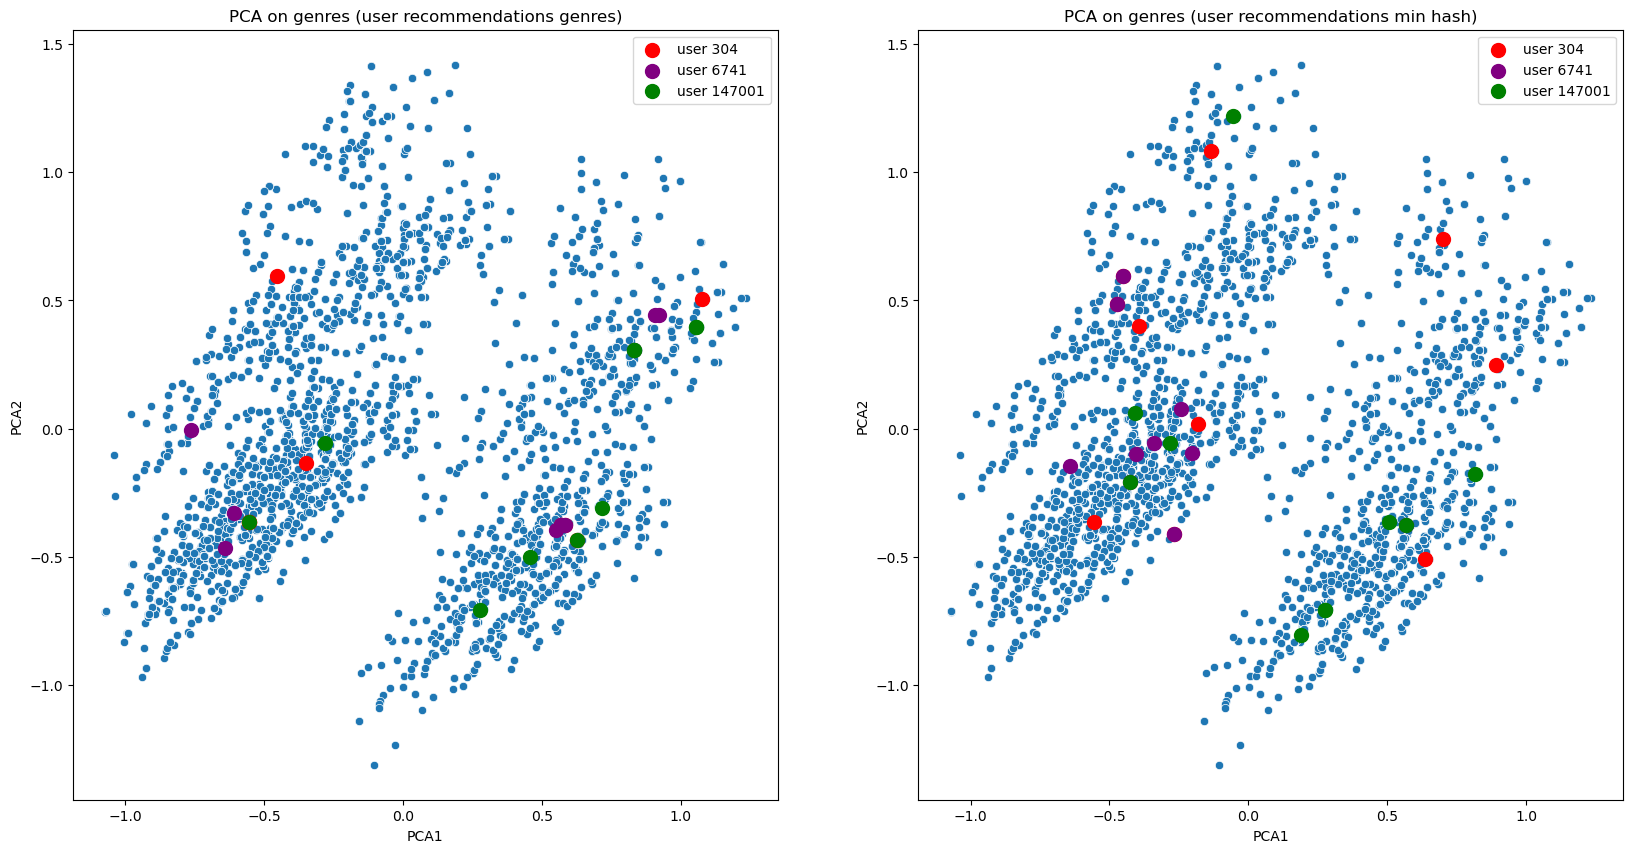

In [103]:
# Randomly sample df_user_recommendations_genres where the value of the similarity is 1
recommendations_genres_sort = {userid: [(movieid, score) for movieid, score in recommendations if score == 1] for userid, recommendations in dict_user_recommendations_genres.items()}

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
K = 10
# Plot for df_user_recommendations_genres
sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[0])
axes[0].set_title('PCA on genres (user recommendations genres)')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

colors = ['red', 'purple', 'green']
for i, (userid, recommendations_) in enumerate(recommendations_genres_sort.items()):
    legend_added = False
    random.seed(42)
    recommendations = random.sample(recommendations_, 1000)
    count_dots = 0
    for movieid, score in recommendations:
        if count_dots >= K:
            break
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            if userid == 304:
                print(df[df['movieId'] == movieid]['title'], df[df['movieId'] == movieid]['genres'])
            if not legend_added:
                axes[0].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[0].scatter(x, y, color=colors[i], s=100)
            count_dots += 1
        except:
            print(f"movieid {movieid} not found")

axes[0].legend()

# Plot for df_user_recommendations_min_hash
sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[1])
axes[1].set_title('PCA on genres (user recommendations min hash)')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

for i, (userid, recommendations) in enumerate(dict_user_recommendations_min_hash.items()):
    legend_added = False
    for movieid, score in recommendations[:K]:
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            if not legend_added:
                axes[1].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[1].scatter(x, y, color=colors[i], s=100)
        except:
            print(f"movieid {movieid} not found")

axes[1].legend()

plt.show()

[0.15836159 0.1281308 ]
0.28649238945593386


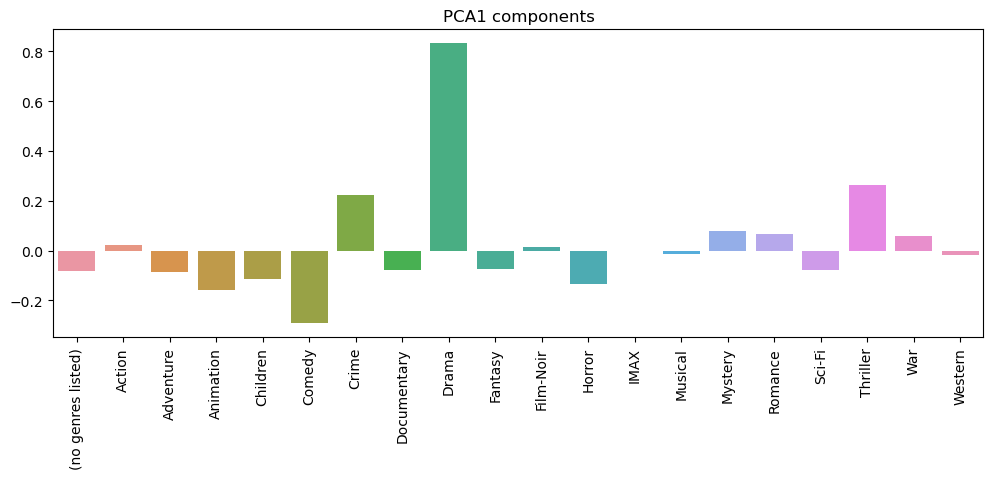

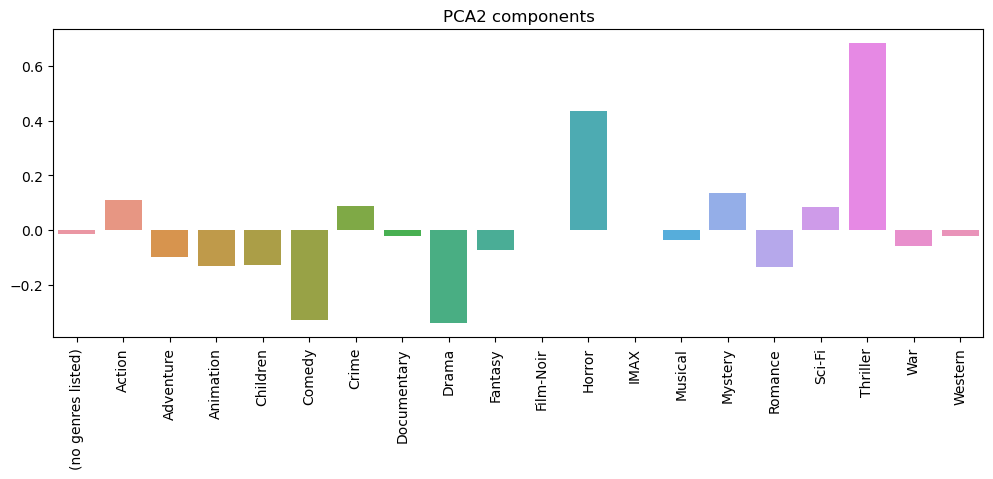

In [85]:
# print explained variance
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# plot pca components
plt.figure(figsize=(12,4))
sns.barplot(x=genres_list, y=pca.components_[0])
plt.xticks(rotation=90)
plt.title('PCA1 components')
plt.show()

# plot pca components
plt.figure(figsize=(12,4))
sns.barplot(x=genres_list, y=pca.components_[1])
plt.xticks(rotation=90)
plt.title('PCA2 components')
plt.show()
